In [78]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

In [6]:
np.random.seed(42)
tensorflow.random.set_seed(42)

In [22]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

print("File format of train_dataset:", train_dataset)
print("File format of test_dataset:", test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


In [23]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


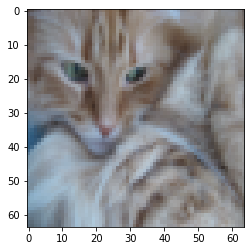

In [31]:
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [34]:
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]

test_set_x = test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]

In [35]:
print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)


In [36]:
print("Validation data size: ", validation_x)
print("Validation data size: ", validation_y)

Validation data size:  [[[[158 104  83]
   [161 106  85]
   [162 107  84]
   ...
   [170 120 100]
   [167 121 103]
   [172 127 109]]

  [[158 103  82]
   [160 104  82]
   [162 105  83]
   ...
   [169 118  99]
   [164 117  98]
   [168 121 104]]

  [[158 104  82]
   [161 105  82]
   [162 105  83]
   ...
   [173 123 102]
   [169 122 104]
   [168 122 104]]

  ...

  [[102  68  52]
   [ 44  31  23]
   [ 28  23  20]
   ...
   [163 118 102]
   [163 120 103]
   [166 121 105]]

  [[ 99  67  51]
   [ 38  28  22]
   [ 30  26  23]
   ...
   [161 117 100]
   [164 121 104]
   [168 123 106]]

  [[127  95  72]
   [ 39  29  22]
   [ 30  25  22]
   ...
   [165 122 105]
   [169 126 109]
   [173 128 110]]]


 [[[115 110 111]
   [137 129 129]
   [155 146 145]
   ...
   [159 156 157]
   [141 141 145]
   [121 122 127]]

  [[123 118 120]
   [143 136 136]
   [159 153 150]
   ...
   [167 164 165]
   [151 151 154]
   [130 133 137]]

  [[135 130 130]
   [150 145 141]
   [164 159 153]
   ...
   [173 174 172]
   [1

In [37]:
print("test_set_x shape: ", test_set_x)
print("test_set_y shape: ", test_set_y)

test_set_x shape:  [[[[209 133  53]
   [207 130  51]
   [181 107  38]
   ...
   [ 28  16   2]
   [ 24  15   2]
   [ 20  14   2]]

  [[218 142  59]
   [216 140  58]
   [202 126  50]
   ...
   [ 29  17   3]
   [ 25  15   3]
   [ 22  15   3]]

  [[227 151  66]
   [226 149  64]
   [217 139  59]
   ...
   [ 29  17   4]
   [ 25  15   4]
   [ 21  14   3]]

  ...

  [[ 21  11   2]
   [ 23  13   3]
   [ 26  14   3]
   ...
   [109  98 103]
   [104  94  99]
   [102  91  97]]

  [[ 21  11   2]
   [ 23  13   3]
   [ 25  13   4]
   ...
   [109 100 105]
   [103  94  99]
   [ 98  90  94]]

  [[ 20  11   2]
   [ 22  12   3]
   [ 23  13   3]
   ...
   [102  90  95]
   [ 97  86  90]
   [ 94  84  89]]]


 [[[247 205 148]
   [248 207 149]
   [249 209 148]
   ...
   [116  46   5]
   [128  58  10]
   [137  66  11]]

  [[244 200 143]
   [242 199 144]
   [234 190 134]
   ...
   [117  46   5]
   [119  50   6]
   [124  53   7]]

  [[240 193 137]
   [239 193 138]
   [208 154 100]
   ...
   [115  45   4]
   [118  

In [51]:
vgg_base = VGG16(weights='imagenet', include_top=False)
vgg_base.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [56]:
inp = Input(shape=(64, 64, 3), name='image_input')

#initiate a model
vgg_model = Sequential()

In [57]:
#Add the VGG base model
vgg_model.add(vgg_base)

In [58]:
vgg_model.add(GlobalAveragePooling2D())

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))

vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))

vgg_model.add(Dense(1, activation='sigmoid'))

In [63]:
sgd = SGD(lr=0.025)
vgg_model.compile(loss= 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [68]:
vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=10, verbose=1, validation_data=(validation_x, validation_y))

Epoch 1/10
7/7 [==============================] - 6s 722ms/step - loss: 58.7498 - accuracy: 0.5120 - val_loss: 0.9869 - val_accuracy: 0.2800
Epoch 2/10
7/7 [==============================] - 5s 644ms/step - loss: 1.0473 - accuracy: 0.5837 - val_loss: 0.3365 - val_accuracy: 0.8400
Epoch 3/10
7/7 [==============================] - 4s 545ms/step - loss: 0.6690 - accuracy: 0.7273 - val_loss: 0.3600 - val_accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 4s 634ms/step - loss: 0.5443 - accuracy: 0.7608 - val_loss: 0.4032 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 4s 548ms/step - loss: 0.4485 - accuracy: 0.8086 - val_loss: 0.2385 - val_accuracy: 0.8800
Epoch 6/10
7/7 [==============================] - 4s 546ms/step - loss: 0.3949 - accuracy: 0.8565 - val_loss: 0.2640 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 4s 540ms/step - loss: 0.3853 - accuracy: 0.8469 - val_loss: 0.2344 - val_accuracy: 0.9600
Epoch 8/10
7/7 [===

In [71]:
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x_orig,test_set_y_orig)

2/2 [==============================] - 1s 301ms/step - loss: 4.6343 - accuracy: 0.3600


In [72]:
print('Test accuracy using VGG16 model as the base:', vgg_model_acc)

Test accuracy using VGG16 model as the base: 0.36000001430511475


In [76]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

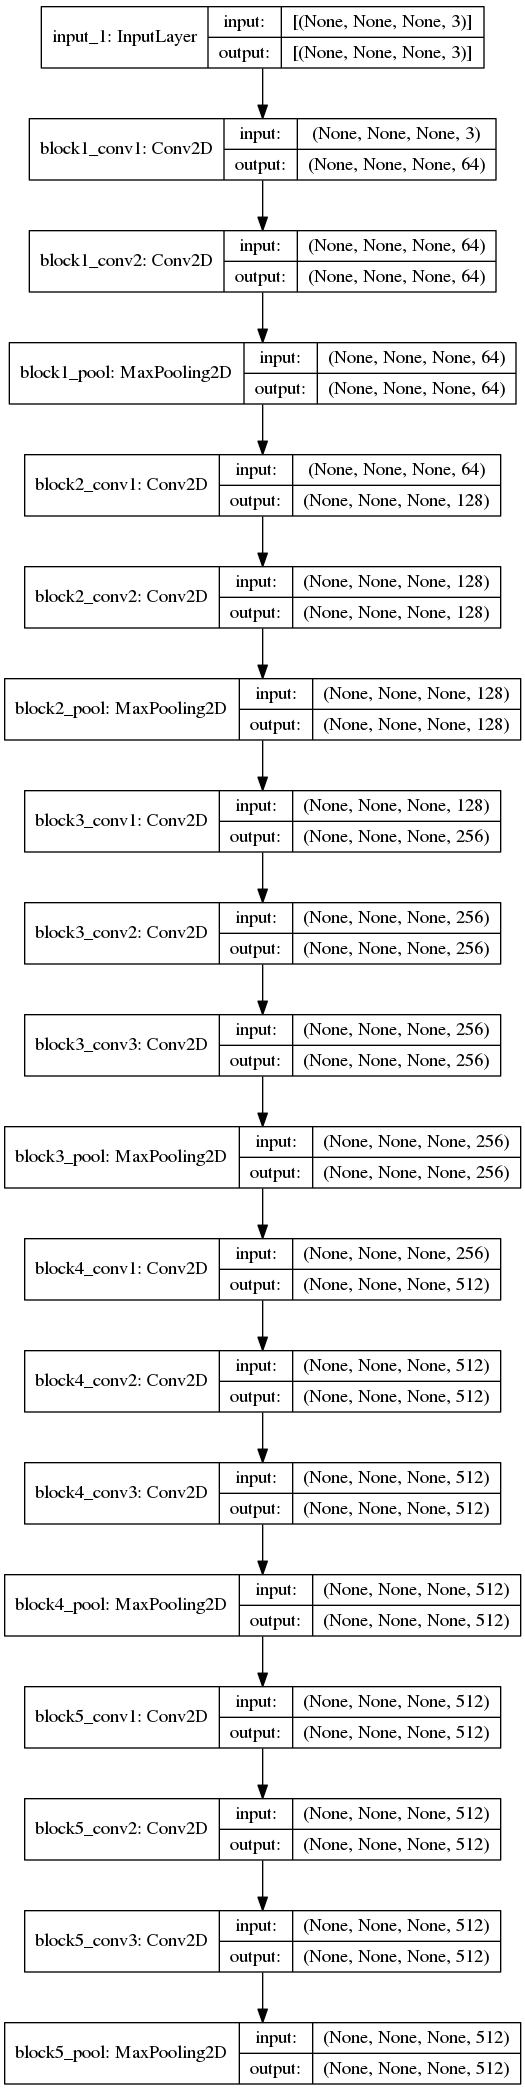

In [79]:
plot_model(vgg_base, show_shapes=True, show_layer_names=True)